In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import os

In [2]:
train_data_gen = ImageDataGenerator(rescale = 1)

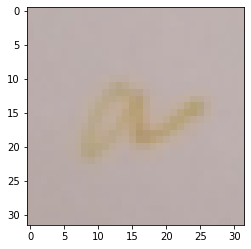

In [3]:
img = load_img('./words/a/01_100.png')
plt.imshow(img)
plt.show()

In [4]:
i = 0
for batch in train_data_gen.flow_from_directory('./words',target_size = (100,100),batch_size = 32):
    image = batch[0].astype('uint8')
    image = np.squeeze(image) 
    i = i+1
    if i > 50:
        break

Found 1573 images belonging to 4 classes.


In [5]:
model = keras.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (100,100,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu',input_shape = (100,100,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu',input_shape = (100,100,3)))
model.add(layers.MaxPooling2D((2,2)))

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(4,activation = 'softmax'))

In [7]:
train_iteraor = train_data_gen.flow_from_directory('./words',batch_size=32,target_size = (100,100))

Found 1573 images belonging to 4 classes.


In [8]:
model.compile(loss ='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
history = model.fit(train_iteraor,validation_data=train_iteraor,epochs=8)

Epoch 1/8
50/50 [==============================] - 6s 130ms/step - loss: 27.0805 - accuracy: 0.3299 - val_loss: 1.3331 - val_accuracy: 0.4221
Epoch 2/8
50/50 [==============================] - 6s 128ms/step - loss: 1.2055 - accuracy: 0.4959 - val_loss: 1.0806 - val_accuracy: 0.5696
Epoch 3/8
50/50 [==============================] - 6s 127ms/step - loss: 0.9761 - accuracy: 0.6109 - val_loss: 0.8317 - val_accuracy: 0.6656
Epoch 4/8
50/50 [==============================] - 6s 127ms/step - loss: 0.8140 - accuracy: 0.6809 - val_loss: 0.7139 - val_accuracy: 0.7292
Epoch 5/8
50/50 [==============================] - 6s 127ms/step - loss: 0.8026 - accuracy: 0.6872 - val_loss: 0.9654 - val_accuracy: 0.6497
Epoch 6/8
50/50 [==============================] - 6s 127ms/step - loss: 0.7408 - accuracy: 0.7146 - val_loss: 0.6172 - val_accuracy: 0.7667
Epoch 7/8
50/50 [==============================] - 6s 127ms/step - loss: 0.5949 - accuracy: 0.7743 - val_loss: 0.5110 - val_accuracy: 0.8017
Epoch 8/8
50

In [137]:
model.save('./Word_prediction_model.h5')